In [1]:
# Make sure this is commented in VS code
#exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')# exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### 10 weeks of Python - Week 3

# Combining, Grouping and plotting data

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Imports and load data - (see week 1&2 if stuck)

In [1]:
# imports
import pandas as pd 
# use numpy nulls
import numpy as np
#matplotlib lets us plot graphs 
import matplotlib.pyplot as plt
#seabrn enables pretty graphs
import seaborn as sns

In [9]:
#load in data 
countries = pd.read_csv('../Assets/Data/Country-cleaned-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,NaN,NaN,NaN,NaN,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Combining data 

Before we can group our data into any meaningful categories we need to get some catgeorical data
To do this we will join(merge) and concatenate(union) some data-sets to our cleaned data from previous weeks.

original continent data from here https://gist.githubusercontent.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c/raw/13716ceb2f22b5643ce5e7039643c86a0e0c6da6/country-and-continent-codes-list-csv.csv

#### Using concat funtion to complete a union

In [28]:
# Load our OG dataset
countries = pd.read_csv('../Assets/Data//Country-cleaned-data.csv')
#countries.head()
countries = countries.drop('Unnamed: 0',axis = 1)

# when combining dataframe shape is very helpful
countries.shape

(164, 10)

In [29]:
# Load new countries added to our data 
new_countries = pd.read_csv('../Assets/Data//new-countries.csv')
new_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Vatican city,0.0,0.0,20.00,20.0,1610,1.00,80.0,5.82,5555
1,San Marino,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4333
2,Lichtenstein,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Bill Gate's island,0.0,0.0,30.00,60.0,5900,0.00,130.0,6.16,1000000000


In [30]:
a = 'hello '
b = 'everyone'

a + b

'hello everyone'

In [31]:
# complete the union CAUTION columns must match so check names!
countries = pd.concat([countries,new_countries], ignore_index = True)

In [32]:
# check shape to see if new rows are in 
countries.shape
#countries.head()

(168, 10)

In [33]:
countries.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
163,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1.460000e+03
164,Vatican city,0.0,0.0,20.00,20.0,1610.0,1.00,80.0,5.82,5.555000e+03
165,San Marino,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4.333000e+03
166,Lichtenstein,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4.460000e+03
167,Bill Gate's island,0.0,0.0,30.00,60.0,5900.0,0.00,130.0,6.16,1.000000e+09


#### Using merge function to do joins

In [34]:
# load in continents data
continents = pd.read_csv('../Assets/Data/country-groups.csv')
continents.duplicated(subset = ['cleaned_country']).sum()
continents.head()

,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number,cleaned_country
0,Asia,AS,AF,4.0,Afghanistan
1,Europe,EU,AL,8.0,Albania
2,Antarctica,AN,AQ,10.0,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZ,12.0,Algeria
4,Oceania,OC,AS,16.0,American Samoa


In [35]:
# uncomment to have a look
#continents.head()
# duplicates are a big worry when joining so check and remove
continents.duplicated(subset = ['cleaned_country']).sum()

10

In [36]:
continents = continents.drop_duplicates(subset = ['cleaned_country'])

In [37]:
#load in the credit ratings data
credit = pd.read_csv('../Assets/Data/country-credit.csv')

In [38]:
# uncomment to have a look
#credit.head()
#check duplicates
credit.duplicated(subset = ['Country']).sum()

0

In [39]:
credit.head()

,Country,credit rating
0,Albania,B+
1,Andorra,BBB
2,Angola,CCC+
3,Argentina,CCC+
4,Armenia,B+


#### Merging data

In [40]:
# Merge lets us build joins, we specify two data frames to join, the columns we should use for the joins and join type
full_country = pd.merge(countries,continents, left_on = 'country',right_on='cleaned_country', how = 'left')

# Take a peek to check it worked
full_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number,cleaned_country
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Asia,AS,AF,4.0,Afghanistan
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Europe,EU,AL,8.0,Albania
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Africa,AF,DZ,12.0,Algeria
3,Angola,NaN,NaN,NaN,NaN,5900.0,22.40,60.1,6.16,3530.0,Africa,AF,AO,24.0,Angola
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,North America,NaN,AG,28.0,Antigua and Barbuda


In [41]:
# Merge lets us build joins, we specify two data frames to join, the columns we should use for the joins and join type
full_country = full_country.merge(credit,left_on = 'country', right_on = 'Country',how='left')

# Take a peek to check it worked
full_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number,cleaned_country,Country,credit rating
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Asia,AS,AF,4.0,Afghanistan,NaN,NaN
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Europe,EU,AL,8.0,Albania,Albania,B+
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Africa,AF,DZ,12.0,Algeria,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,5900.0,22.40,60.1,6.16,3530.0,Africa,AF,AO,24.0,Angola,Angola,CCC+
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,North America,NaN,AG,28.0,Antigua and Barbuda,NaN,NaN


In [42]:
# Joins can introduce duplicates (one of the possible risks) let's check and fix if needed
full_country.duplicated(subset = ['country']).sum()

0

In [43]:
full_country = full_country.drop_duplicates()
full_country = full_country.dropna(how = 'all')

full_country.shape

(168, 17)

In [44]:
# let's output this for use with hypothesis and modelling later
full_country.to_csv('../Assets/Data/modelling_countries.csv')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Use the data sets above to create a different dataset layout for full_country
 
 1. Experiment with different join types, what happens to the shape of full_country?
 2. Experiment with leaving duplicates in, what happens to our end result?
 3. Does changing the order of the tables or order you join in change the end result?
 4. If possible practice usng joins on your own data 
 
 We will discuss our findings as a group

In [72]:
# code here

table1 = pd.read_csv('../Assets/Data/Country-cleaned-data.csv').drop('Unnamed: 0',axis = 1)
table2 = pd.read_csv('../Assets/Data/country-groups.csv')

table1.merge(table2,left_on = 'country', right_on = 'cleaned_country', how = 'right').shape
# pd.merge(table1,table2, left_on = 'country', right_on = 'cleaned_country', how = 'left').shape

(262, 15)

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Grouping

#### Groupby

In [75]:
# you can use group by to group data by a categorical field
gdp_by_continent = full_country.groupby('Continent_Name')[['gdpp']].mean()

# output the resulting table
gdp_by_continent

,gdpp
Continent_Name,
Africa,2524.674419
Asia,11585.000000
Europe,26405.071429
North America,11400.153846
Oceania,12750.000000
South America,8209.090909


In [76]:
# to sort and selec key fields add a sort_values and [[]] to select columns
gdp_by_continent = full_country.groupby('Continent_Name').mean().sort_values('gdpp')[['health','gdpp']]

#output the resulting table
gdp_by_continent

,health,gdpp
Continent_Name,,
Africa,6.188333,2524.674419
South America,7.029091,8209.090909
North America,7.303846,11400.153846
Asia,4.993714,11585.000000
Oceania,7.541250,12750.000000
Europe,8.609524,26405.071429


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your cleaned data set from last week (or one of the practice sets)
 
 
 1. Apply a grouping to your data output the result as a new dataframe
 2. Apply another grouping output it as another new data frame


In [84]:
# code here
full_country.groupby('Continent_Name').sum()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country_Number
Continent_Name,,,,,,,,,,
Africa,3465.5,1318.810,259.91,1833.1000,227434.0,444.336,2631.2,199.94,108561.0,19640.0
Asia,1105.0,1547.189,174.78,1563.7659,720700.0,373.722,2533.5,96.89,405475.0,15697.0
Europe,343.2,2179.900,361.60,2252.9000,1182740.0,154.175,3241.4,68.04,1109013.0,16345.0
North America,422.3,456.300,94.95,632.7000,180090.0,43.508,936.3,30.64,148202.0,2895.0
Oceania,191.4,258.700,60.33,440.0000,97890.0,25.470,555.0,26.60,102000.0,3424.0
South America,220.5,352.700,77.32,345.1000,143740.0,125.150,821.8,25.71,90300.0,4640.0


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Visualising

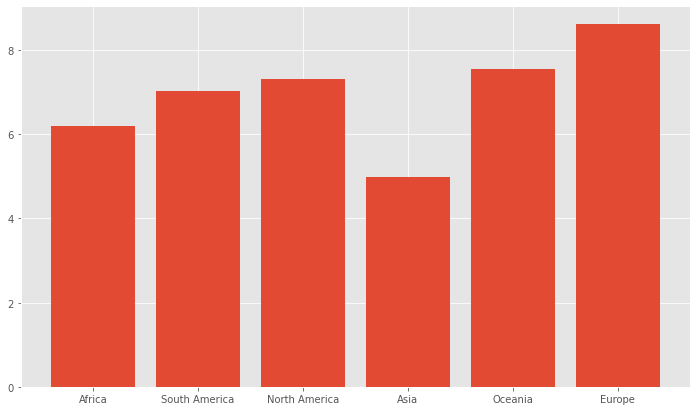

In [95]:
# plot data in  bar chart

# set up a figure and set of axis to plot on
fig1,ax = plt.subplots(figsize=(12,7))

# plot bar graph using .bar
ax.bar(gdp_by_continent.index, gdp_by_continent['health']);

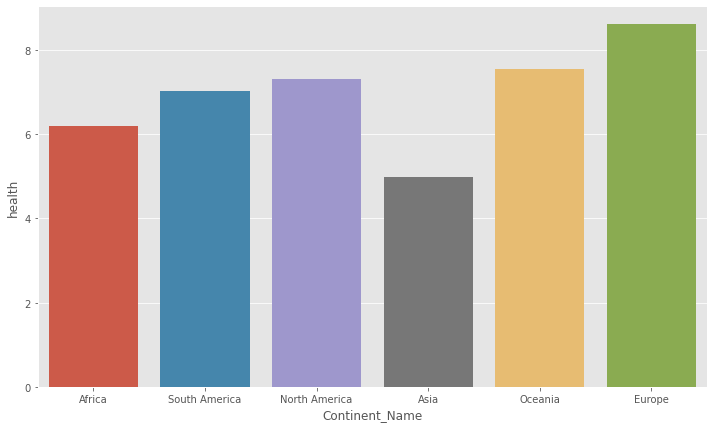

In [96]:
# set up a figure and set of axis to plot on
fig2,ax = plt.subplots(figsize=(12,7))

#use seaborn to plot 
sns.barplot(x = gdp_by_continent.index,y= gdp_by_continent['health']);

In [88]:
# load in a demo ts from github hosted data
df = pd.read_csv("https://raw.githubusercontent.com/NickGMV/online-data-hosting/main/Workshop2/mr_feast_views.csv")
# create grouped table to plot
dsr = df.groupby('days_since_release').mean()[['views_change']]#.sort_values('views_change')
# take a quick peek
dsr.head()

,views_change
days_since_release,
0,1.363229e+06
1,1.140361e+06
2,8.786818e+05
3,5.223446e+05
4,6.603268e+05


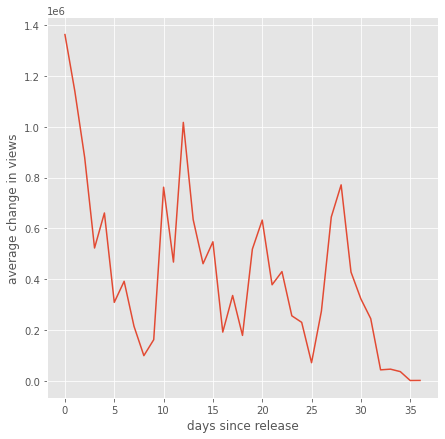

In [94]:
# plot this as a time series
fig3,ax = plt.subplots(figsize=(7,7))

# set labels 
ax.set_xlabel('days since release')
ax.set_ylabel('average change in views')

#plot using matplotlib
ax.plot(dsr.index, dsr['views_change']);


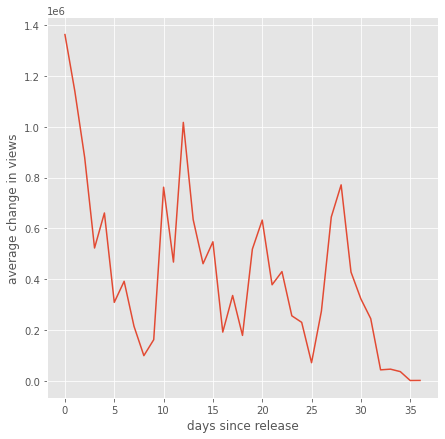

In [93]:
# plot this as a time series
fig4,ax = plt.subplots(figsize=(7,7))

#set labels
ax.set_xlabel('days since release')
ax.set_ylabel('average change in views')

# plot using seaborn
sns.lineplot(x= dsr.index, y = dsr['views_change']);

##### Changing plot styles and exporting

In [91]:
# You can add styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [92]:
# make our notebook use a particular style pre-set
plt.style.use('ggplot')

In [97]:
# output figures as png/jpg
fig4.savefig('../Assets/Charts/demoimg.png')

In [98]:
# we could build a loop to output our figures
i = 1
for f in [fig1, fig2, fig3, fig4]:
    f.savefig(f'../Assets/Charts/demo{i}.png')
    i+=1

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your cleaned data set from last week (or one of the practice sets)
 
 1. Plot your data using matplotlib
 2. Plot your data using Seaborn
 3. Set a new overall visualisation style
 4. Can you output you visuals?

In [30]:
# code here

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">


### See you next time


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">